In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from derivative import dxdt
from scipy.integrate import solve_ivp
import lorenz_utils_edmd as lorenz
import rossler_utils_edmd as rossler
import edmd


# Lorenz Attractor

In [2]:
SIGMA = 10
RHO = 28
BETA = 8/3
T0 = 0.001
DT = 0.001
T = 80
P_order = 2
threshold = 0.25
lorenz_params =[SIGMA,RHO,BETA]
u0 = np.array([0,8,27])
Eta = 250

In [3]:
time = np.array([]) #Empty time array to fill for the x-axis
x = np.array([]) #Empty array for x values
y = np.array([]) #Empty array for y values
z = np.array([]) #Empty array for z values
r = np.array([-8.0, 8.0, 27.0]) #Initial conditions array

In [4]:
t,U,UP = lorenz.generate_data(u0,T0,T,DT,lorenz_params)
tn,Un,UPn = lorenz.generate_noisy_data(Eta,u0,T0,T,DT,lorenz_params)

In [5]:
ThetaR, ThetaRd = edmd.trial_function_eval(np.transpose(U), np.transpose(UP))
A=edmd.findA(ThetaR, ThetaRd)
ThetaRn, ThetaRdn = edmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
An=edmd.findA(ThetaRn, ThetaRdn)
print(A[0:3])

[[-9.96469918  9.97561167  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [27.70077182 -0.87422123  0.          0.          0.          0.
   0.         -0.99047492  0.          0.46548844]
 [ 0.          0.         -2.60131453  0.          0.          0.
   0.98745016  0.          0.         -0.42887242]]


In [6]:
A = A[np.nonzero(A[0:3])]
print(A.shape)

(9,)


In [8]:
A = A.reshape(9,1)

In [9]:
edmd_time, edmd_data = lorenz.edmd_lorenz_trajectory(u0,A,T0,T,DT)

[[-9.96469918]
 [ 9.97561167]
 [27.70077182]
 [-0.87422123]
 [-0.99047492]
 [ 0.46548844]
 [-2.60131453]
 [ 0.98745016]
 [-0.42887242]]
(9, 1)


TypeError: lorenz_dt() takes 9 positional arguments but 11 were given

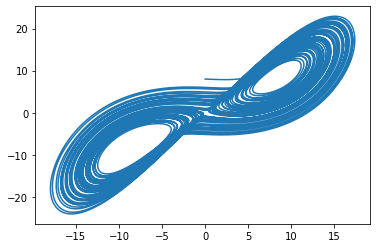

In [12]:
plt.plot(edmd_data.T[0],edmd_data.T[1])

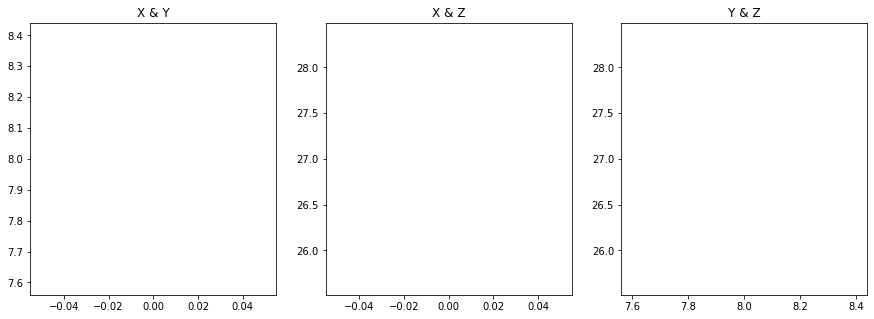

In [9]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()

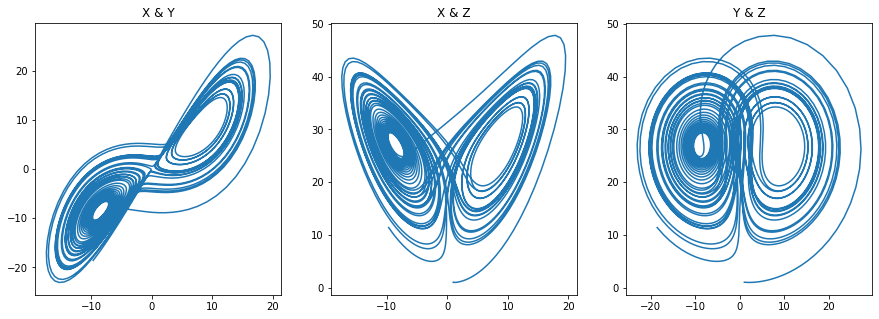

In [16]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x1, y1)
ax1.set_title("X & Y")
ax2.plot(x1, z1)
ax2.set_title("X & Z")
ax3.plot(y1, z1)
ax3.set_title("Y & Z")
plt.show()